In [55]:
using Plots
using FFTW

In [56]:
# reverse a signal about the first element
flip(x) = x[-(0:length(x)-1) .& (length(x)-1) .+ 1]

flip (generic function with 1 method)

In [101]:
N = 8
# x = Array(1:N)
# x = Array(1:N).^2
x = rand(-9:9, N) + rand(-9:9, N)*im
# x = cos.((0:N-1).*(6π/N))
# plot(x)

y = fft(x)
# plot([x, abs.(y)])
round.([x y]; digits=2)

8×2 Matrix{ComplexF64}:
  3.0-1.0im    30.0-16.0im
  9.0-4.0im    -5.0-21.87im
 -5.0-7.0im    20.0+10.0im
  8.0+5.0im   -1.34-3.93im
  9.0+2.0im   -10.0-12.0im
  4.0+6.0im    -5.0+31.87im
  3.0-8.0im     8.0+22.0im
 -1.0-9.0im  -12.66-18.07im

# Calculating a complex valued FFT

In [102]:
# calculate FFT of odd elements
xo = Array(x)
xo[2:2:N] .= 0
yo = fft(xo)

# calculate FFT of even elements
xe = Array(x)
xe[1:2:N] .= 0
ye = fft(xe)

# FFT is linear, you can add the results
round.([yo ye yo + ye]; digits=2)

8×3 Matrix{ComplexF64}:
 10.0-14.0im   20.0-2.0im      30.0-16.0im
 -5.0+5.0im     0.0-26.87im    -5.0-21.87im
 14.0+16.0im    6.0-6.0im      20.0+10.0im
 -7.0-11.0im   5.66+7.07im    -1.34-3.93im
 10.0-14.0im  -20.0+2.0im     -10.0-12.0im
 -5.0+5.0im     0.0+26.87im    -5.0+31.87im
 14.0+16.0im   -6.0+6.0im       8.0+22.0im
 -7.0-11.0im  -5.66-7.07im   -12.66-18.07im

The FFT of a sequence with even elements 0s is the FFT of the odd elements repeated twice.

The FFT of a sequence with odd elements 0s is the FFT of the evens phase shifted by half a sample and repeated twice with the second repetition negated.

In [103]:
# fft of evens and odds without zeros inserted
phase = cispi.(-(0:N÷2-1)./(N÷2))
yo = fft(x[1:2:N])
ye = fft(x[2:2:N]).*phase

# add them to get the full fft
round.([yo ye yo + ye; yo -ye yo - ye;]; digits=2)

8×3 Matrix{ComplexF64}:
 10.0-14.0im   20.0-2.0im      30.0-16.0im
 -5.0+5.0im     0.0-26.87im    -5.0-21.87im
 14.0+16.0im    6.0-6.0im      20.0+10.0im
 -7.0-11.0im   5.66+7.07im    -1.34-3.93im
 10.0-14.0im  -20.0+2.0im     -10.0-12.0im
 -5.0+5.0im    -0.0+26.87im    -5.0+31.87im
 14.0+16.0im   -6.0+6.0im       8.0+22.0im
 -7.0-11.0im  -5.66-7.07im   -12.66-18.07im

# Real and Imaginary Valued FFTs

In [104]:
# calculate FFT of just real values
yre = fft(real(x))
yim = fft(imag(x)im)

# FFT is linear, you can add the results
round.([yre yim yre + yim]; digits=2)

8×3 Matrix{ComplexF64}:
  30.0+0.0im     0.0-16.0im     30.0-16.0im
 -8.83-1.9im    3.83-19.97im    -5.0-21.87im
  14.0-6.0im     6.0+16.0im     20.0+10.0im
 -3.17-17.9im   1.83+13.97im   -1.34-3.93im
 -10.0+0.0im     0.0-12.0im    -10.0-12.0im
 -3.17+17.9im  -1.83+13.97im    -5.0+31.87im
  14.0+6.0im    -6.0+16.0im      8.0+22.0im
 -8.83+1.9im   -3.83-19.97im  -12.66-18.07im

In [105]:
# works the other way too if you have the FFT
y2 =  conj(flip(y))
yre = (y + y2)/2
yim = (y - y2)/2
round.([yre yim]; digits=2)

8×2 Matrix{ComplexF64}:
  30.0+0.0im     0.0-16.0im
 -8.83-1.9im    3.83-19.97im
  14.0-6.0im     6.0+16.0im
 -3.17-17.9im   1.83+13.97im
 -10.0+0.0im     0.0-12.0im
 -3.17+17.9im  -1.83+13.97im
  14.0+6.0im    -6.0+16.0im
 -8.83+1.9im   -3.83-19.97im

# Real Valued FFTs

In [175]:
x = real(x)
xo = x[1:2:N]
xe = x[2:2:N]
round.([x fft(x)]; digits=2)

8×2 Matrix{ComplexF64}:
  3.0+0.0im   30.0+0.0im
  9.0+0.0im  -8.83-1.9im
 -5.0+0.0im   14.0-6.0im
  8.0+0.0im  -3.17-17.9im
  9.0+0.0im  -10.0+0.0im
  4.0+0.0im  -3.17+17.9im
  3.0+0.0im   14.0+6.0im
 -1.0+0.0im  -8.83+1.9im

In [109]:
x2 = x[1:2:N] + x[2:2:N]im
y = fft(x2)
y2 = conj(flip(y))
yo = (y + y2)/2
ye = (y - y2)/2 * -im.*phase

round.(yo + ye; digits=2)

4-element Vector{ComplexF64}:
  30.0 + 0.0im
 -8.83 - 1.9im
  14.0 - 6.0im
 -3.17 - 17.9im

# Calculating DCTs via the FFT

## DCT-II

In [172]:
dct2(x) = real(fft([x; reverse(x)])[1:N].*cispi.(-(0:N - 1)/2N))
dct2(x)

8-element Vector{Float64}:
  60.0
   7.43347275247129
 -17.76661673384627
  23.075948547524177
  11.31370849898476
 -12.499426521577348
 -35.50137081624615
 -18.111002680745553

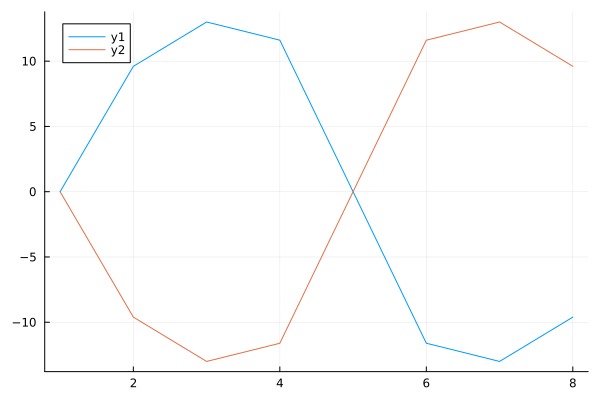

In [182]:
x2 = [x; reverse(x)]
xo = x2[1:2:2N]
yo = fft(xo)
phase = cispi.(-(0:N-1)./(N))
ye = fft(flip(xo)) #.*phase
# ye = conj(yo).*phase
round.((yo + ye).*cispi.(-(0:N-1)/2N); digits=2)

plot(imag.([yo ye]))

In [173]:
# DCT-III
dct3(x) = real(fft([x; 0; -reverse(x); -x[2:N]; 0; reverse(x[2:N])])[2:2:2N])/2
dct3(dct2(x))/2N - x

8-element Vector{Float64}:
 -4.440892098500626e-16
  0.0
  0.0
 -8.881784197001252e-16
  0.0
  0.0
  0.0
 -4.440892098500626e-16

In [176]:
# DCT - IV
dct4(x) = real(fft([x; -reverse(x); -x; reverse(x)])[2:2:2N].*cispi.((1:2:2N-1)/-4N))

norm4 = sqrt(2)/N
dct4(dct4(x))*norm4^2 - 2x

8-element Vector{Float64}:
  3.552713678800501e-15
  0.0
 -1.7763568394002505e-15
  1.0658141036401503e-14
  7.105427357601002e-15
  1.7763568394002505e-15
  1.7763568394002505e-15
  2.220446049250313e-16